In [9]:
import sqlite3 as sqlite
import pandas as pd

In [10]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv"

In [23]:
df = pd.read_csv(url, index_col="PassengerId")

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
con = sqlite.connect(":memory:")
cur = con.cursor()

In [26]:
df.to_sql("titanic", con)

In [27]:
pd.read_sql(
    """
    SELECT * FROM titanic
    """, con
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,None,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,None,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,None,S


In [49]:
pd.read_sql(
    """
    SELECT sum(t.Age)/count(t.Age) avg_age, t.Pclass
    FROM titanic t
    GROUP BY t.Pclass
    """, con
)

,avg_age,Pclass
0,38.111111,1
1,28.114828,2
2,24.307143,3


In [42]:
df.sample(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S


https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_all

1. Выберите заказчиков из Германии, Франции и Мадрида, выведите их название, страну и адрес.
SELECT c.CustomerName, c.Country, c.Address FROM Customers c WHERE c.Country IN ('Germany', 'France', 'Madrid');

2. Выберите топ 3 страны по количеству заказчиков, выведите их названия и количество записей.
SELECT c.Country, COUNT(*) n FROM Customers c GROUP BY c.Country ORDER BY COUNT(*) DESC LIMIT 3

3. Выберите перевозчика, который отправил 10-й по времени заказ, выведите его название, и дату отправления.


4. Выберите самый дорогой заказ, выведите список товаров с их ценами.
5. Какой товар больше всего заказывали по количеству единиц товара, выведите его название и количество единиц в каждом из заказов.
6. Выведите топ 5 поставщиков по количеству заказов, выведите их названия, страну, контактное лицо и телефон.
7. Какую категорию товаров заказывали больше всего по стоимости в Бразилии, выведите страну, название категории и сумму.
8. Какая разница в стоимости между самым дорогим и самым дешевым заказом из США.
9. Выведите количество заказов у каждого их трех самых молодых сотрудников, а также имя и фамилию во второй колонке.
10. Сколько банок крабового мяса всего было заказано.
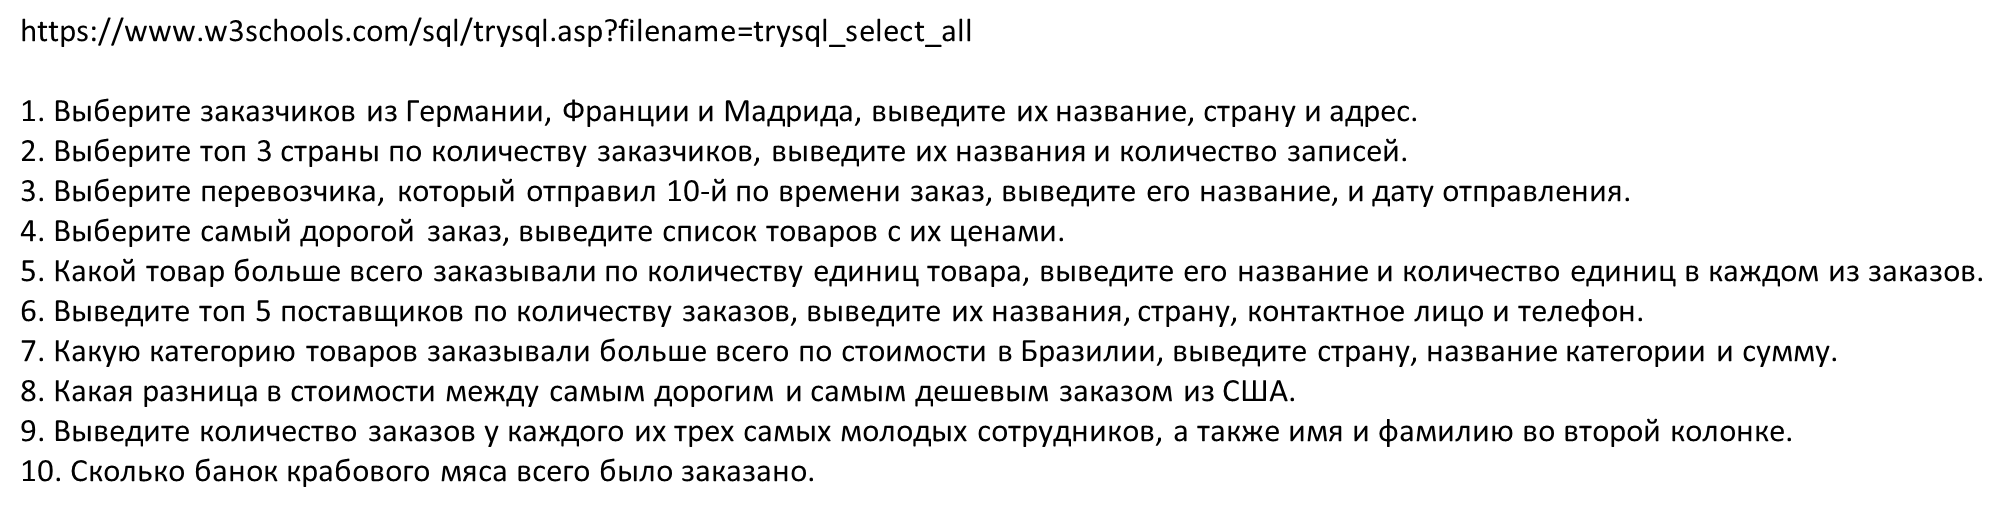